In [270]:
import numpy as np
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as image
import random
import time
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [271]:
def gen_label(image):
    try:
        label = image.split('.')[-3]
    except:
        label = None
    finally:
        if label == 'cat':
            return [1, 0]
        elif label == 'dog':
            return [0, 1]
        else:
            return [0, 0]

In [272]:
def read_directory(**kwargs):

    for filename in os.listdir(kwargs['directory_name']):
        #if (filename == '')
        label = gen_label(filename)
        img = cv2.imread(kwargs['directory_name'] + "/" + filename)
        if img is None:
            pass
        else:
            kwargs['array_image'].append([img, np.array(label)])

    return np.array(kwargs['array_image'])

In [273]:
def display_one(a, title1 = "Original"):
    plt.imshow(a)
    plt.title(title1)
    plt.xticks([])
    plt.yticks([])
    plt.show()

def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121)
    plt.imshow(a)
    plt.title(title1)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(122)
    plt.imshow(b)
    plt.title(title2)
    plt.show()

In [274]:
def time_sleep():
    for i in range(5):
        time.sleep(1)
        print('.', end = '')
    print()

In [275]:
## 1. read datas that each data has three-dimension (height, width, RGB) 
#Global variable
array_of_img = []
test_of_img = []

print('----------------------------')
print('cats train_data loading', end = '')
data = read_directory(array_image = array_of_img, directory_name = 'D:/deep-learning/images/dataset/training_set/cats')
time_sleep()
print('----------------------------')
print('dogs train_data loading', end = '')
datasets = read_directory(array_image = array_of_img, directory_name = 'D:/deep-learning/images/dataset/training_set/dogs')
time_sleep()
print('----------------------------')
print('cats test_data loading', end = '')
test_data = read_directory(array_image = test_of_img, directory_name = 'D:/deep-learning/images/dataset/test_set/cats')
time_sleep()
print('----------------------------')
print('dogs test_data loading', end = '')
test_datasets = read_directory(array_image = test_of_img, directory_name = 'D:/deep-learning/images/dataset/test_set/dogs')
time_sleep()
print('----------------------------')
print('clean memeory space')
#release memory space 
array_of_img.clear()
test_of_img.clear()

----------------------------
cats train_data loading.....
----------------------------
dogs train_data loading.....
----------------------------
cats test_data loading.....
----------------------------
dogs test_data loading.....
----------------------------
clean memeory space


In [276]:
#data = np.reshape(data, (data.shape[0], data[0][0].shape[0], data[0][0].shape[1], data[0][0].shape[2]))

type(data)
print(data.shape)
#print(data[0][0].shape)

(4000, 2)


In [277]:
random.shuffle(datasets)
random.shuffle(test_datasets)
datasets.shape
test_datasets.shape

(2000, 2)

In [278]:
## 3. distribution train, valid and test data
train_image, train_label = (datasets[:6000, 0], datasets[:6000, 1])
valid_image, valid_label = (datasets[6000:, 0], datasets[6000:, 1])
test_image, test_label = (test_datasets[:, 0], test_datasets[:, 1])
print('train_image shape: ',train_image.shape)
print('valid_image shape: ',valid_image.shape)
print('test_image shape: ',test_image.shape)
print('train_label shape: ',train_label.shape)
print('valid_label shape: ',valid_label.shape)
print('test_label shape: ',test_label.shape)

train_image shape:  (6000,)
valid_image shape:  (2000,)
test_image shape:  (2000,)
train_label shape:  (6000,)
valid_label shape:  (2000,)
test_label shape:  (2000,)


In [279]:
datasets = None
test_datasets = None

In [280]:
## 2. resize each data
def processing(data, lab):
    #img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data[:3]]
    
    print('The Second Original size', data[1].shape)
    height = 50
    width = 50
    dim = (width, height)
    res_img = []
    res_lab = []
    for i in range(len(data)):
        res = cv2.resize(data[i], dim, interpolation = cv2.INTER_LINEAR)
        res_img.append(res)
        res_lab.append(lab[i])
        
    print("The Second Resized size", res_img[1].shape)
    resized = res_img[1]
    display(data[1], resized, 'Originial', 'Resized')
    return np.array(res_img), np.array(res_lab)

The Second Original size (280, 300, 3)
The Second Resized size (50, 50, 3)


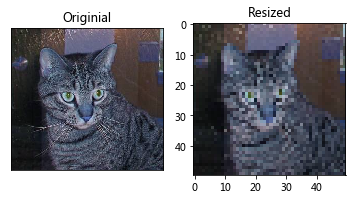

The Second Original size (333, 499, 3)
The Second Resized size (50, 50, 3)


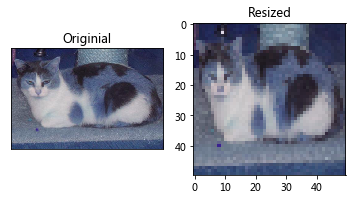

The Second Original size (415, 498, 3)
The Second Resized size (50, 50, 3)


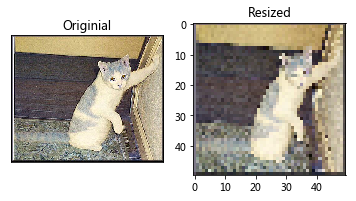

In [281]:
train_image, train_label = processing(train_image, train_label)
valid_image, valid_label = processing(valid_image, valid_label)
test_image, test_label = processing(test_image, test_label)

In [282]:
print('train_image shape: ', train_image.shape)
print('train_label shape: ', train_label.shape)
print('train_label the first shape: ', train_label[0].shape)
print('train_label the first type: ', type(train_label[0]))
print('train_label the first content: ', train_label[0])

train_image shape:  (6000, 50, 50, 3)
train_label shape:  (6000, 2)
train_label the first shape:  (2,)
train_label the first type:  <class 'numpy.ndarray'>
train_label the first content:  [1 0]


In [297]:
## 4. initial variable
weights = None
biases = None
#train_image = np.reshape(train_image, (train_image.shape[0], 50 * 50 * 3))
#valid_image = np.reshape(valid_image, (valid_image.shape[0], 50 * 50 * 3))
#test_image = np.reshape(test_image, (test_image.shape[0], 50 * 50 * 3))
#n_images = 50 * 50 *3
n_images = [50, 50, 3]
n_labels = 2
learning_rate = 1e-3
graph = tf.Graph()
sess = tf.Session(graph = graph)

In [308]:
## 5. initial Graph structure
with graph.as_default():
    train_images = tf.placeholder(tf.float32, [None] + n_images)
    train_labels = tf.placeholder(tf.float32, [None, n_labels])
    
    weights, biases, _y, loss = structure(images = train_images,
                                          labels = train_labels,
                                          weights = weights,
                                          biases = biases)
    train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    
    new_images = tf.placeholder(tf.float32, [None] + n_images)
    new_labels = tf.placeholder(tf.float32, [None, n_labels])
    weights, biases, new_y, new_loss = structure(images = new_images,
                                                 labels = new_labels,
                                                 weights = weights,
                                                 biases = biases)
    init_op = tf.global_variables_initializer()

ValueError: Negative dimension size caused by subtracting 2 from 1 for 'MaxPool_2' (op: 'MaxPool') with input shapes: [?,1,1,6].

In [309]:
def structure(images, labels, weights, biases):
    if (weights is None) or (biases is None):
        weights = {
            'conv1' : tf.Variable(tf.truncated_normal([50, 50, 3, 6], stddev = 0.1)),
            'fc1' : tf.Variable(tf.truncated_normal([4*4*6, n_labels]))
        }
        biases = {
            'conv1' : tf.Variable(tf.zeros([6], dtype = tf.float32)),
            'fc1' : tf.Variable(tf.zeros([n_labels], dtype = tf.float32))    
        }
    
    conv1 = get_conv_2d_layer(images,
                              weights['conv1'],
                              biases['conv1'],
                              activation = tf.nn.relu)
    pool2 = tf.nn.max_pool(conv1,
                           ksize = [1, 2, 2, 3], strides = [1, 2, 2, 3], padding = 'VALID')
    
    flatten = get_flatten_layer(pool2)
    logits = get_dense_layer(images = flatten,
                             weight = weights['fc1'],
                             bias = biases['fc1'])
    _y = tf.nn.softmax(logits)
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = labels, logits = logits))
    
    return (weights, biases, _y, loss)

In [310]:
def get_conv_2d_layer(images, weight, bias, strides = (1, 1), padding = 'VALID', activation = None):
    x = tf.add(
        tf.nn.conv2d(images,
                     weight,
                     [1, strides[0], strides[1], 3],
                     padding = padding), bias)
    if activation:
        x = activation(x)
    return x

In [301]:
def get_dense_layer(images, weight, bias, activation = None):
    x = tf.add(tf.matmul(images, weight), bias)
    if activation:
        x = activation(x)
    return x

In [302]:
def get_flatten_layer(input_layer):
    shape = input_layer.get_shape().as_list() #only tensor can used
    n = 1
    for s in shape[1:]:
        n = n * s
        print('n :', n)
    x = tf.reshape(input_layer, [-1, n])
    return x

In [303]:
def _check_array(ndarray):
    ndarray = np.array(ndarray)
    if len(ndarray) == 1:
        ndarray = np.reshape(ndarray, (1, ndarray.shape[0]))
    return ndarray

In [304]:
def predict(X):
    X = _check_array(X)
    #y = _check_array(y)
    
    feed_dict = {
         new_images : X
     #    new_labels : y
    }
    return sess.run(new_y, feed_dict = feed_dict)

In [290]:
def evaluate(X, y):
    X = _check_array(X)
    y = _check_array(y)
    feed_dict = {
        new_images : X,
        new_labels : y
    }
    return sess.run(new_loss, feed_dict)

In [291]:
def accuracy(predictions, labels):
    return np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1)) / predictions.shape[0]

In [292]:
def fit(X, y, epochs = 10, learning_rate = 1e-3, valid_data = None, test_data = None):
    X = _check_array(X)
    y = _check_array(y)
    
    train_loss_list = []
    train_acc_list = []
    test_acc_list = []
    val_loss_list = []
    val_acc_list = []
    sess.run(init_op)
    for epoch in range(epochs):
        print('Epoch %2d/%2d: ' % (epoch + 1, epochs))
        
        feed_dict = {
            train_images : X,
            train_labels : y
        }
        sess.run(train_op, feed_dict = feed_dict)
        Y = predict(X)
        train_loss = evaluate(X, y)
        train_acc = accuracy(Y, y)
        train_loss_list.append(train_loss)
        train_acc_list.append(train_acc)
        print('train loss %8.4f, train acc %3.2f%%' % (train_loss, train_acc * 100), end = '')
        
        if valid_data is not None:
            val_Y = predict(valid_data[0])
            val_loss = evaluate(valid_data[0], valid_data[1])
            val_acc = accuracy(val_Y, valid_data[1])
            val_loss_list.append(val_loss)
            val_acc_list.append(val_acc)
            print('val loss %8.4f, val acc %3.2f%%' % (val_loss, val_acc * 100))
            
        if test_data is not None:
            test_Y = predict(test_data[0])
            test_acc = accuracy(test_Y, test_data[1])
            print('test acc %3.2f%%' % (test_acc * 100))
    
    ans = {
        'train_loss' : train_loss_list,
        'train_acc' : train_acc_list,
        'val_loss' : val_loss_list,
        'val_acc' : val_acc_list,
        'test_acc' : test_acc_list
    }
    
    return ans

In [260]:
dic_ans = fit(X = train_image,
              y = train_label,
              epochs = 50,
              learning_rate = 1e-3,
              valid_data = (valid_image, valid_label),
              test_data = (test_image, test_label))

Epoch  1/50: 
train loss 1383.6400, train acc 93.23%val loss 9258.1582, val acc 55.35%
test acc 84.85%
Epoch  2/50: 
train loss 661.3469, train acc 86.10%val loss 3223.1814, val acc 55.45%
test acc 80.90%
Epoch  3/50: 
train loss 674.6323, train acc 89.70%val loss 3991.1653, val acc 55.10%
test acc 83.45%
Epoch  4/50: 
train loss 937.5963, train acc 73.20%val loss 1930.6782, val acc 56.30%
test acc 70.55%
Epoch  5/50: 
train loss 2473.8218, train acc 93.25%val loss 16543.5254, val acc 55.35%
test acc 84.85%
Epoch  6/50: 
train loss 1533.0811, train acc 93.23%val loss 10314.6484, val acc 55.35%
test acc 84.85%
Epoch  7/50: 
train loss 669.0037, train acc 90.53%val loss 4151.7080, val acc 55.45%
test acc 83.80%
Epoch  8/50: 
train loss 1306.1985, train acc 60.60%val loss 1651.9940, val acc 54.95%
test acc 60.20%
Epoch  9/50: 
train loss 4342.6172, train acc 93.25%val loss 28947.4668, val acc 55.35%
test acc 84.85%
Epoch 10/50: 
train loss 3401.7437, train acc 93.25%val loss 22718.5879, v

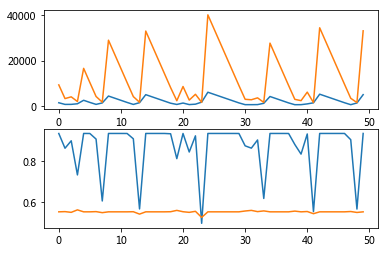

In [268]:
plt.subplot(211)
plt.plot(dic_ans['train_loss'])
plt.plot(dic_ans['val_loss'])
plt.subplot(212)
plt.plot(dic_ans['train_acc'])
plt.plot(dic_ans['val_acc'])

In [159]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST/data', one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST/data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST/data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [161]:
train_data = mnist.train
valid_data = mnist.validation
test_data = mnist.test

In [162]:
train_image, train_labels = train_data.images, train_data.labels

In [166]:
print(type(train_image))
print(type(train_image[0]))
print(train_image[0])
print(type(train_labels))
print(type(train_labels[0]))
print(train_labels[0])
print(train_labels.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.     

In [234]:
%who_ls

[]

In [231]:
import gc

In [232]:
gc.collect()

33332

In [233]:
%reset -f